In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def conv(image, kernel):
    height, width = image.shape
    h, w = kernel.shape
    # 经滑动卷积操作后得到的新的图像的尺寸
    new_h = height -h + 1
    new_w = width -w + 1
    new_image = np.zeros((new_h, new_w), dtype=float)
    # 进行卷积操作,实则是对应的窗口覆盖下的矩阵对应元素值相乘,卷积操作
    for i in range(new_w):
        for j in range(new_h):
            new_image[i, j] = np.sum(image[i:i+h, j:j+w] * kernel)
    new_image = new_image.clip(0, 255)
    new_image = np.rint(new_image).astype('uint8')
    return new_image

In [16]:
image_color = cv.imread("img.jpg")
image = cv.cvtColor(image_color,cv.COLOR_BGR2GRAY)

In [29]:
sobel_x = np.array([[-1.0,0,1],[-2,0,2],[-1,0,1]])

In [30]:
sobel_y = np.array([[1.0,2,1],[0,0,0],[-1,-2,-1]])

In [33]:
sobel_xy = np.sqrt((sobel_x**2)+(sobel_y**2))

In [34]:
print(sobel_xy)

[[1.41421356 2.         1.41421356]
 [2.         0.         2.        ]
 [1.41421356 2.         1.41421356]]


In [35]:
imagex = conv(image,sobel_x)

In [36]:
imagey = conv(image,sobel_y)

In [37]:
imagexy = conv(image,sobel_xy)

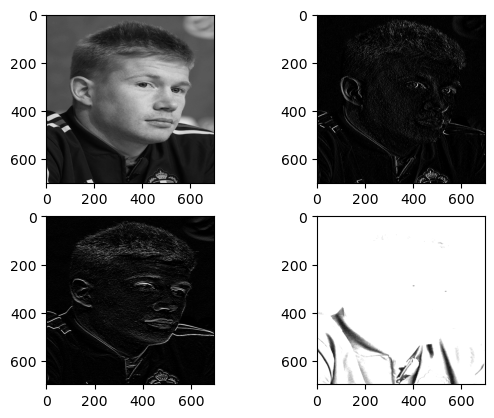

In [38]:
plt.figure()
plt.subplot(2,2,1)
plt.imshow(image,plt.cm.gray)
plt.subplot(2,2,2)
plt.imshow(imagex,plt.cm.gray)
plt.subplot(2,2,3)
plt.imshow(imagey,plt.cm.gray)
plt.subplot(2,2,4)
plt.imshow(imagexy,plt.cm.gray)